In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

sns.set()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from mnist import MNIST

def load_dataset():
    mndata = MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, X_test,labels_train,labels_test

In [2]:
x_train,x_test,labels_train,labels_test = load_dataset()

In [3]:
len(x_test)

10000

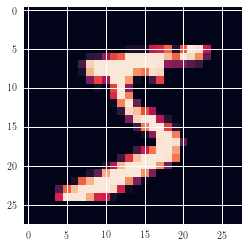

5

In [4]:
single_image = np.reshape(x_train[0][:],[28,28])
plt.imshow(single_image)
plt.show()
labels_train[0]

labels_onehot_train = np.zeros((np.max(np.size(labels_train)),10))
for i in range(len(labels_onehot_train)):
    labels_onehot_train[i,labels_train[i]] = 1


In [5]:
def train(x,y,lambda_cnst):
    # remove the mean in preprocessing 
    x = x - np.matlib.repmat(np.mean(x,axis=1),np.shape(x)[1],1).T
    
    # compute w_hat - inversion
    #w_hat = np.dot(np.linalg.inv(lambda_cnst*np.identity(np.shape(x)[1]) +(np.dot(x.T,x))),(np.dot(x.T,y)))
    
    # without inversion |
    a = (np.dot(x.T,x)) + lambda_cnst*np.identity(np.shape(x)[1]) 
    b = (np.dot(x.T,y))
    #import pdb; pdb.set_trace()
    w_hat = np.linalg.solve(a,b)
    return w_hat

In [6]:
def predict(w,x_prime):
    classified = np.argmax(np.dot(x_prime,w),axis=1)
    return classified

In [24]:
def evaluate(results,truth):
    truth_array = np.array(truth)
    results_array = np.array(results)
    accuracy = np.sum(truth_array==results_array)/len(truth_array)
    return accuracy

In [8]:
def feature_transform(pixels,p):
    var = 0.1
    std_dev = var**0.5
    center = 0
    d = np.shape(pixels)[0]
    g_vec = std_dev*np.random.randn(d,p) + center
    b = np.squeeze(2*np.pi*np.random.rand(p,1))
    
    transformed_pixels = np.cos(np.squeeze(np.dot(g_vec.T,pixels))+b)
    return transformed_pixels

In [62]:
def random_partition(data,labels,proportion):
    inds = np.random.choice(len(data),np.int(proportion*len(data)),replace=False)
    train_set = data[inds,:]
    train_labels = labels[inds,:]
    
    inds_set = set(inds)
    total_set = set(np.arange(len(data)))
    #import pdb; pdb.set_trace()
    valid_inds = list(total_set - inds_set)
    validation_set = data[valid_inds,:]
    validation_labels = labels[valid_inds,:]
    return train_set,train_labels,validation_set,validation_labels

In [37]:
def hoeffding():
    return conf_interval,expect_test

In [38]:
lambda_cnst = 10**-4
w_hat = train(x_train,labels_onehot_train,lambda_cnst)
predictions_train = predict(w_hat,x_train)
predictions_test = predict(w_hat,x_test)

In [39]:
evaluate(predictions_train,labels_train)
evaluate(predictions_test,labels_test)

0.85194999999999999

0.85340000000000005

In [64]:
t_s,t_l,v_s,v_l = random_partition(x_train,labels_onehot_train,0.8)

In [ ]:
p_list = [1 10 100 1000]
plt.figure()

for p in p_list:
    x_trans = []feature_transform 
    w_hat = train(x_train,labels_onehot_train,lambda_cnst)
    predictions_train = predict(w_hat,x_train)
    predictions_test = predict(w_hat,x_test)